Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [4]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [5]:
data_path = '../../Downloads/train.csv'
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

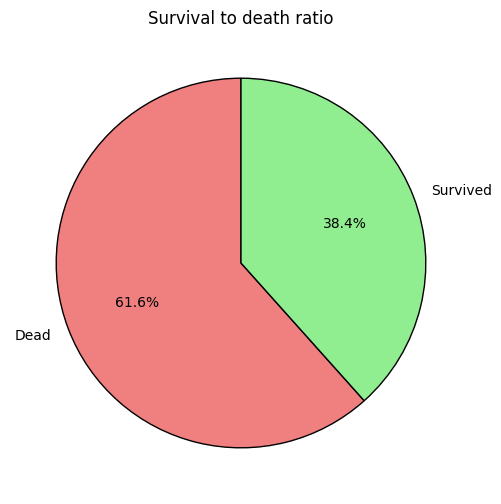

In [7]:
survived_counts = df["Survived"].value_counts()
labels = ["Dead", "Survived"]
colors = ["lightcoral", "lightgreen"]

plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Survival to death ratio")
plt.show()

The pie chart shows that the majority of passengers did not survive, approximately 62%, while only 38% survived.
This indicates a high mortality rate among the Titanic's passengers, and confirms that less than half of them survived.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


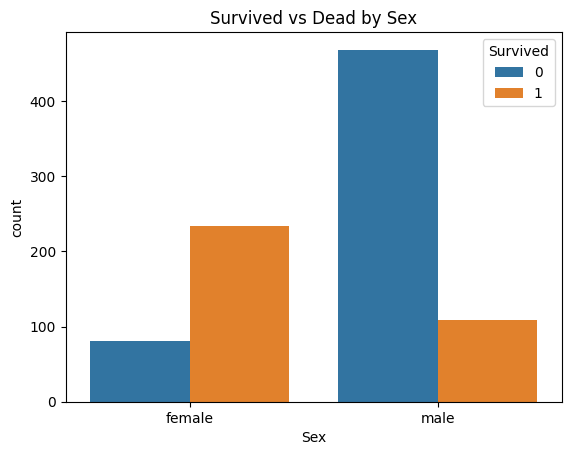

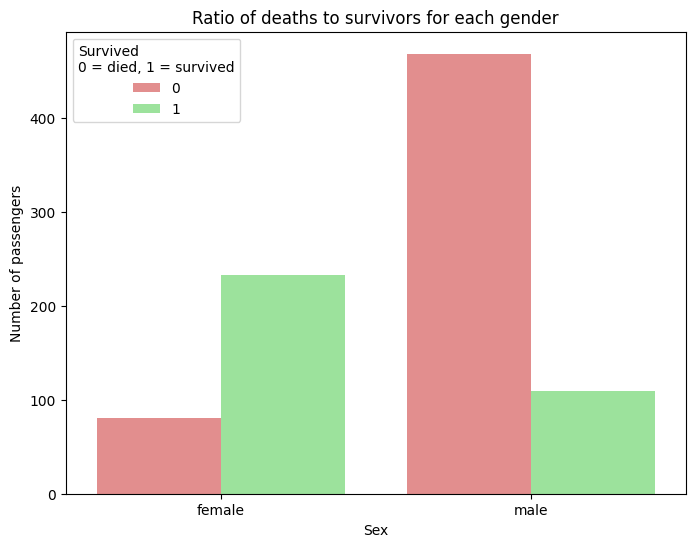

In [23]:
grouped_df = df.groupby(["Sex", "Survived"], as_index=False).size()

plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="size", hue="Survived", data=grouped_df, palette={0: "lightcoral", 1: "lightgreen"})
plt.title("Ratio of deaths to survivors for each gender")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.legend(title="Survived\n0 = died, 1 = survived")
plt.show()

Female:
*   Most women survived. They had a much higher chance of survival.
Male:
*   Most men died. Tey were mostly unable to escape.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

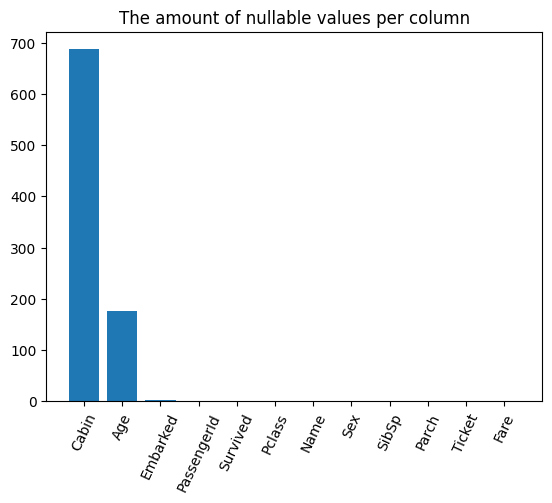

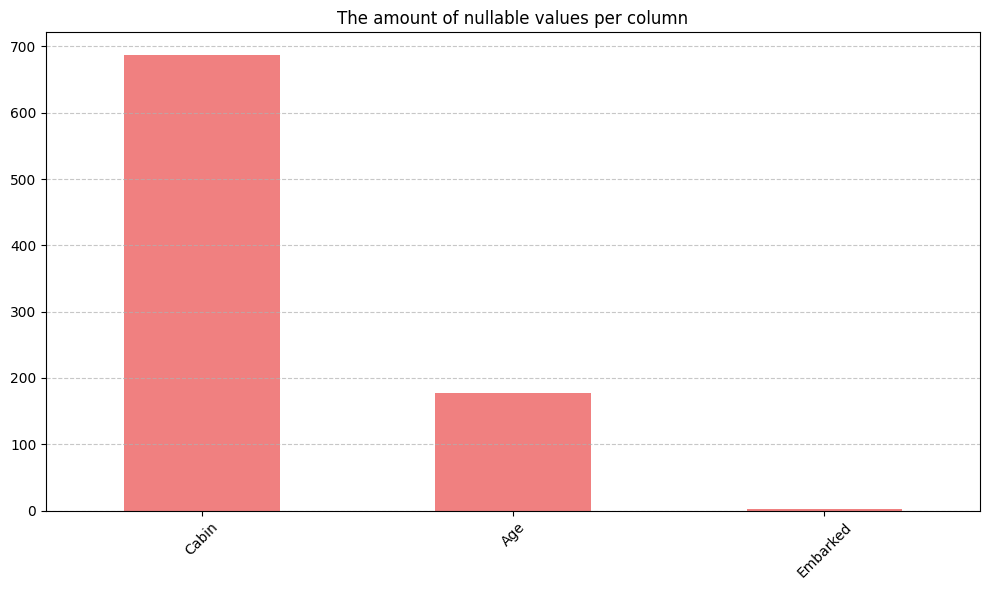

In [21]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.sort_values(ascending=False).plot(kind="bar", color="lightcoral")
plt.title("The amount of nullable values per column")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*   "Cabin" - has the largest number of nullable values. This amount of missing data makes the column problematic for analysis. I think, we should delete "Cabin" column
*   "Age" - has over 150 null values. However, is is a very important variable as age affects person's pressire and posibility to be physically strong enough to save themselves. We can filted it before analysis or delete rows/people with missed "Age".
* "Embarked" - has a few missing values. Can be easily cleared without losing important information.
* Other columns have no missing values.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

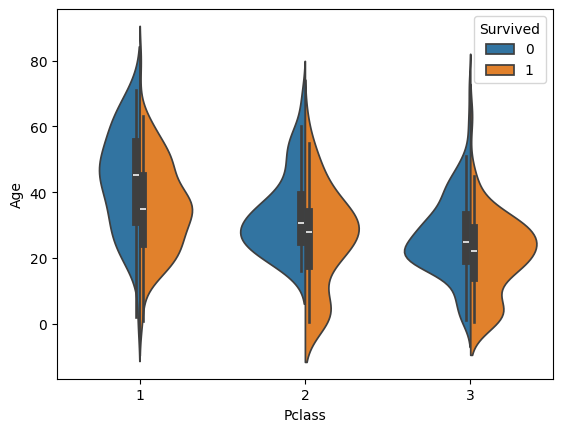

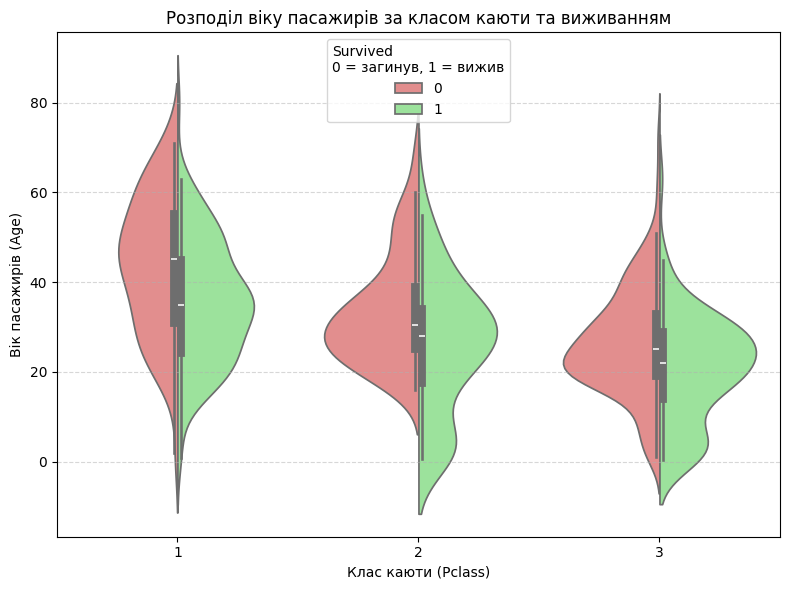

In [26]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette={0: "lightcoral", 1: "lightgreen"})
plt.title('Розподіл віку пасажирів за класом каюти та виживанням')
plt.xlabel('Клас каюти (Pclass)')
plt.ylabel('Вік пасажирів (Age)')
plt.legend(title='Survived\n0 = загинув, 1 = вижив')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Class 1:
*   The passengers were older on average. The servivors were somewhat younger, but in general the ages of the survivors and the dead overlap here. The survival rate is somethat better than is classes 2 - 3. Most likely, it is due to the people's status. They were in 1st class and they had financial opportunity to be there. That makes them more valuable
Class 2:
* The ages of the survivors and the dead are similar. The grapgh is symmetrical - which means the distribution is approzimately the same. Maybe that is because the majority of people can afford 2ns class.
Class 3:
* The youngest average age. Many children, expecially among the survivors. Many of the dead are also young - probably due to the lowest proirity during evacuation. This confirms the theory about financial status and priority.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


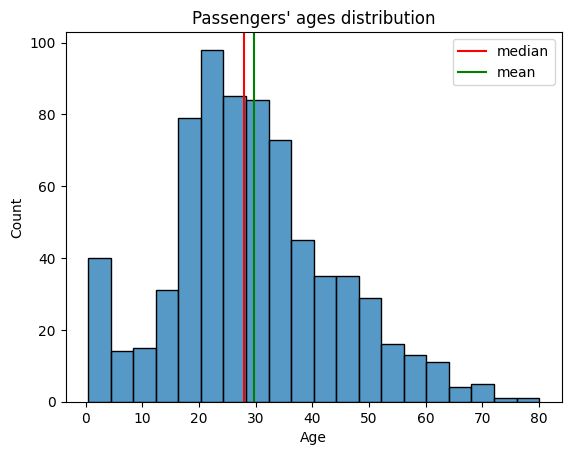

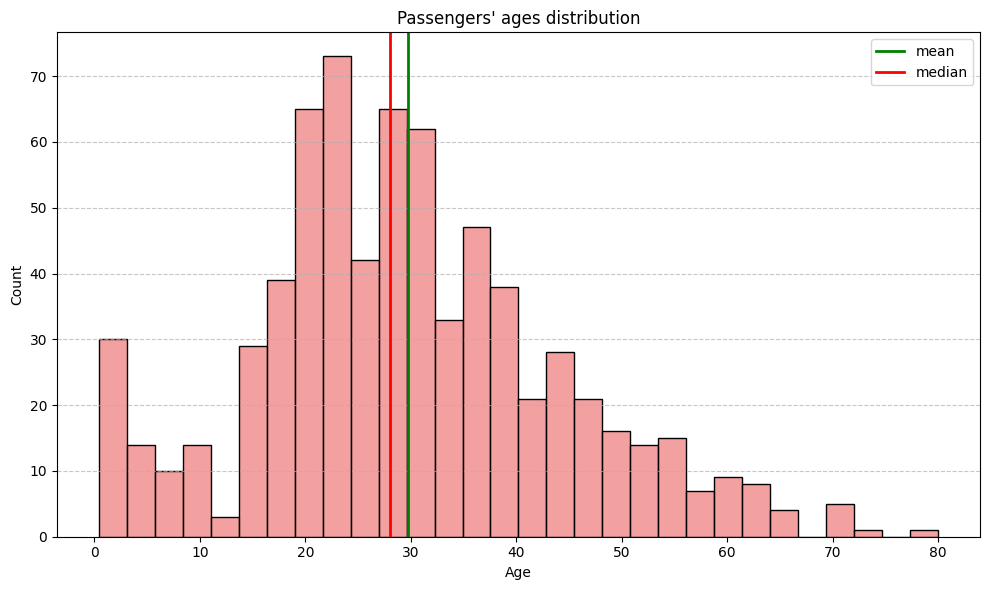

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"].dropna(), bins=30, kde=False, color="lightcoral", edgecolor="black")

plt.axvline(df["Age"].mean(), color="green", linestyle='-', linewidth=2, label="mean")
plt.axvline(df["Age"].median(), color="red", linestyle='-', linewidth=2, label="median")

plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The histogram shows the distribution of passengers by age. The peak falls on the age group of 20 - 30 years. Median - the age, that divides the sample in half: half of the passengers are younger, half are older. Mean - the average age of passengers. The graph shows tsmall children, as well as elderly passengers.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

How did the number of parents, brothers, sisters, relatives, childer, etc. affected survival?

<ipython-input-35-3d950db5531c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Relatives", y="Survived", data=df, palette="Blues")


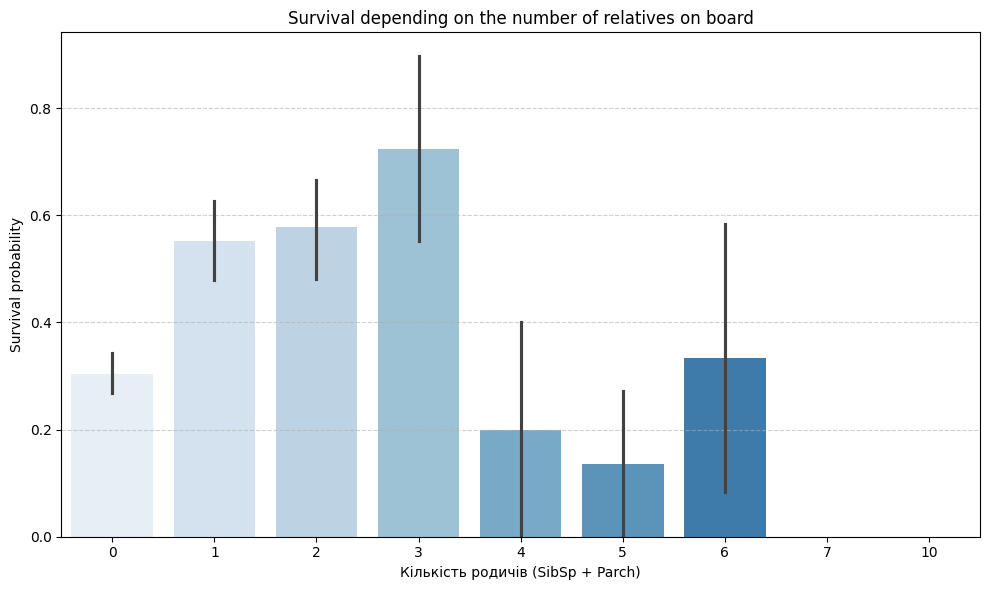

In [35]:
df["Relatives"] = df["SibSp"] + df["Parch"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Relatives", y="Survived", data=df, palette="Blues")
plt.title("Survival depending on the number of relatives on board")
plt.xlabel("Кількість родичів (SibSp + Parch)")
plt.ylabel("Survival probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* 0 relatives - low level of survival. Passengers who traveled alone (adults without children) often do not have support and proirity during evacuation.
* 2 - 3 relatives - the highest probability of survival. People in small family groups could have helped each other.
* 4+ relatives - the propability of survival is reduced. In large families, it could be more difficult to organize, keep everyone together, especially young children and elderly.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

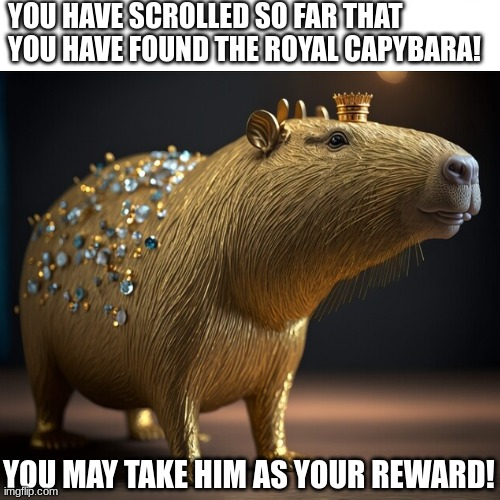